In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
df = pd.read_csv("data/olympics.csv",skiprows=1)
df.rename(columns={df.columns[0]:"Country"},inplace=True)
df = df.iloc[:-1,:] # drop the last row
df_summer = df.iloc[:,1:5]
df_summer['Country'] = df.Country
df_summer.columns = ['NumGames','Gold','Silver','Bronze','Country']
df_winter = df.iloc[:,6:10]
df_winter['Country'] = df.Country
df_winter.columns = ['NumGames','Gold','Silver','Bronze','Country']
df_summer
df_summer_clean = pd.melt(df_summer,id_vars="Country",
                value_vars=["Gold","Silver","Bronze"],var_name="Type",value_name="NumWon")
df_winter_clean = pd.melt(df_winter,id_vars="Country",
                value_vars=["Gold","Silver","Bronze"],var_name="Type",value_name="NumWon")
df_summer_clean["Season"] = "Summer"
df_winter_clean["Season"] = "Winter"
df_clean = pd.concat([df_summer_clean, df_winter_clean],axis=0)
df_clean.reset_index(inplace=True,drop=True)
df_clean.Type.unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [8]:
sns.set()
sns.set_style("white")

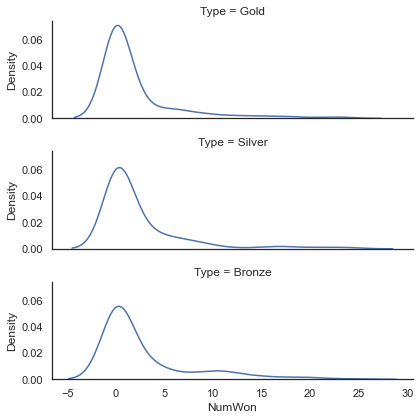

In [29]:
sns.displot(df_clean[df_clean.NumWon < 25],x="NumWon",row="Type",height=2,aspect=3,kind="kde")

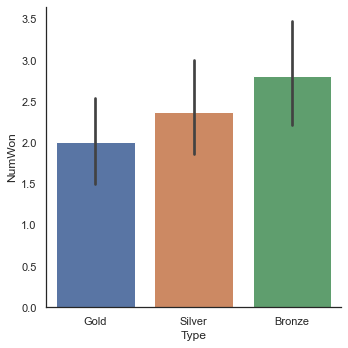

In [34]:
sns.catplot(data=df_clean[df_clean.NumWon < 25],x="Type",y="NumWon",kind="bar")

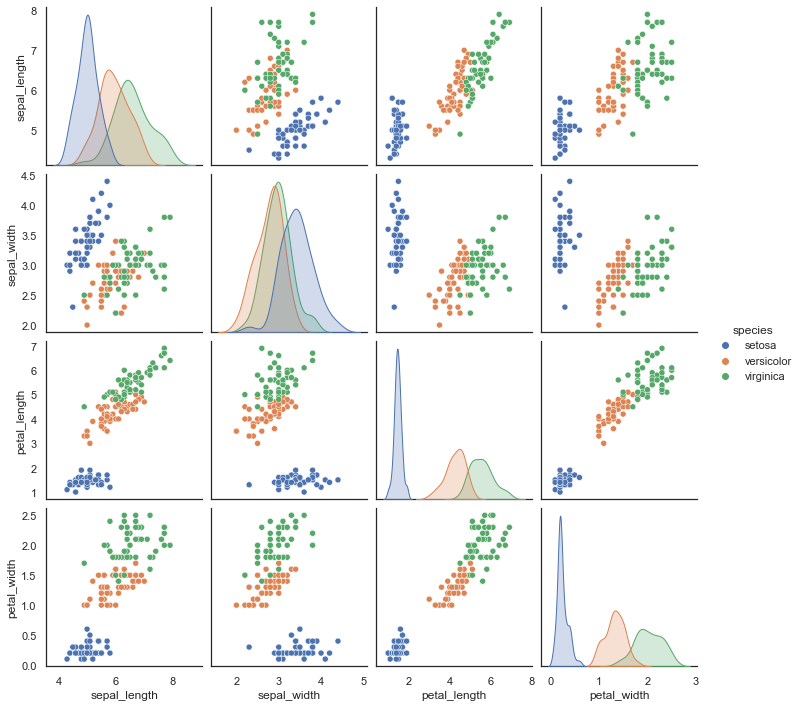

In [38]:
iris = sns.load_dataset("iris")
sns.pairplot(data=iris,hue="species")

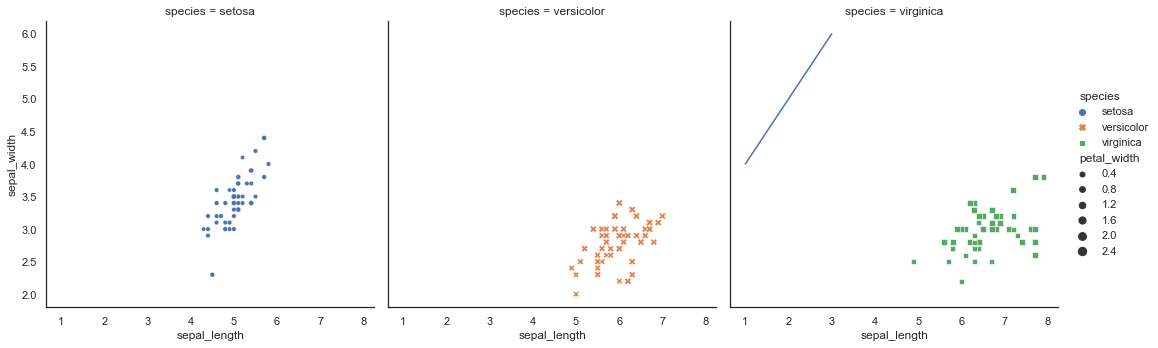

In [45]:
sns.relplot(data=iris,x="sepal_length",y="sepal_width",hue="species",style="species",size="petal_width",col="species")
plt.plot([1,2,3],[4,5,6])